<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     117 non-null    int64  
 1   JAN      117 non-null    float64
 2   FEB      117 non-null    float64
 3   MAR      117 non-null    float64
 4   APR      117 non-null    float64
 5   MAY      117 non-null    float64
 6   JUN      117 non-null    float64
 7   JUL      117 non-null    float64
 8   AUG      117 non-null    float64
 9   SEP      117 non-null    float64
 10  OCT      117 non-null    float64
 11  NOV      117 non-null    float64
 12  DEC      117 non-null    float64
 13  ANNUAL   117 non-null    float64
 14  JAN-FEB  117 non-null    float64
 15  MAR-MAY  117 non-null    float64
 16  JUN-SEP  117 non-null    float64
 17  OCT-DEC  117 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 16.6 KB


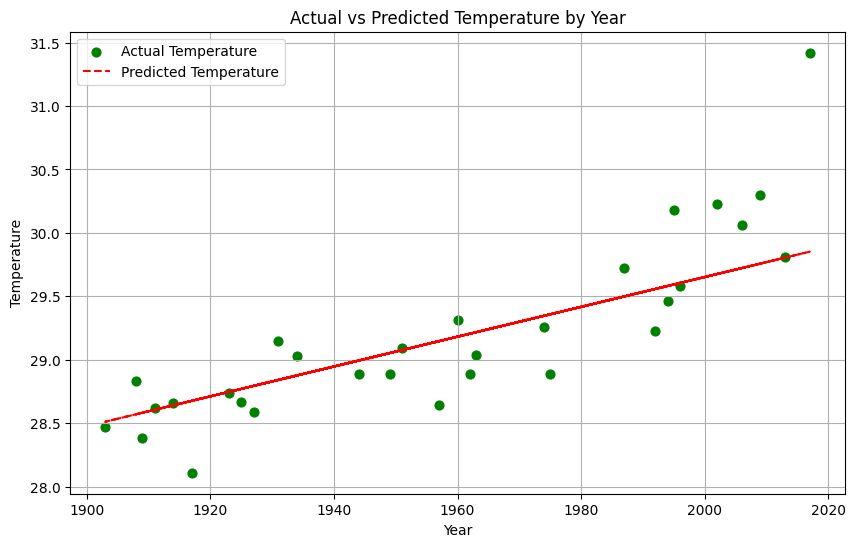

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv('/content/temperatures - temperatures.csv')
data.info()
data.shape

X = data[['YEAR']]
y = data['ANNUAL']

data = data.dropna(subset=['YEAR', 'ANNUAL'])
assert len(X) == len(y), f"Length mismatch: X has {len(X)} rows, but y has {len(y)} rows."

X
y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
model = LinearRegression();
model.fit(X_train, y_train);

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
mse_train = mean_squared_error(y_train, y_train_pred);
mae_train = mean_squared_error(y_train, y_train_pred);
r2_train= r2_score(y_train, y_train_pred);

mse_test=mean_squared_error(y_test,y_test_pred)
mae_test=mean_squared_error(y_test,y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_test
mse_train
mae_test
mae_train
r2_train
r2_test

df_test = X_test.copy()
df_test['ANNUAL'] = y_train
plt.figure(figsize=(10, 6))
plt.scatter(df_test['YEAR'], y_test, color='green', marker='o', linestyle='-', label="Actual Temperature", s=40)
plt.plot(df_test['YEAR'], y_test_pred, color='red', linestyle='--', label="Predicted Temperature")
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature by Year')
plt.legend()
plt.grid(True)
plt.show()